<a href="https://colab.research.google.com/github/invtrdan/Machine-Learning/blob/main/Predicting_Car_Prices_from_Features_(Regression%2C_Features%2C_TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Predicting Car Prices from Features (Regression, Features, TensorFlow)

*   Training models with TensorFlow
*   Using a real dataset to predict car prices from their features



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd                                # to load and manipulate dataset
import seaborn as sns                              # for nicer plots
sns.set(style="darkgrid")                          # default style

import tensorflow as tf                            # to build and train a model using Tensorflow

### Import Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

automobile = fetch_ucirepo(id=10)                  # fetch dataset

X = automobile.data.features                       # data (as pandas dataframes)
y = automobile.data.targets

print(automobile.metadata)                         # metadata

print(automobile.variables)                        # variable information


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

### Load Data
Loading the data using the column names from Automobile Data Set.

In [ ]:
# Provide the names for the feature columns since the CSV file with the data
# does not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
car_data = pd.read_csv(
    'https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
    sep=',', names=cols, header=None, encoding='latin-1')

# Display applies built-in formatting for nicer printing, if available.
display(car_data)

,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Randomize
Since we'll be using SGD (Stochastic Gradient Descent) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. Note that the original data (above) appears sorted by *make* in alphabetic order.

In [ ]:
# We want to shuffle the order of the rows without touching the columns.
# First, we get a list of indices corresponding to the rows.
indices = np.arange(car_data.shape[0])
print('indices:', indices, '\n')

# Next, we shuffle the indices using np.random.permutation but set a random seed
# so that everyone gets the same results each time.
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# Finally, we use dataframe.reindex to change the ordering of the original
# dataframe.
car_data = car_data.reindex(shuffled_indices)
display(car_data)

# Note that this could be done in one fancy line:
# car_data = car_data.reindex(np.random.permutation(car_data.shape[0]))

indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204] 

shuffled indices: [ 52 181   5  18 188 170  76 154 104  33  12 129  55  66  45 169 130   7
  37 152  80 111 131 171 179 138 156 113 161  89 183 193 125 173 

,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
181,-1,?,toyota,gas,std,four,wagon,rwd,front,104.5,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
117,0,161,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250


### Feature selection
To keep things simple, we will keep just a few of the 26 columns. Since the values come as strings, we need to convert them to floats. Also, we remove examples (rows) that have some missing value(s) of the columns we care about. Note that in general, there are various ways to deal with missing features, and this strategy of dropping examples with any missing feature is not ideal.

In [ ]:
# Choose a subset of columns (these are all numeric).
columns = ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
car_data = car_data[columns]

# Convert strings to numeric values, coercing missing values to nan.
# for column in columns:
#   car_data[column] = pd.to_numeric(car_data[column], errors='coerce')

for column in columns:
    car_data.loc[:, column] = pd.to_numeric(car_data[column], errors='coerce')


# The dropna function drops rows with missing value(s) by default.
car_data = car_data.dropna()

# This leaves us with 199 examples.
display(car_data)

,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,68.0,5000.0,31,38,6795.0
181,156.0,5200.0,19,24,15750.0
5,110.0,5500.0,19,25,15250.0
18,48.0,5100.0,47,53,5151.0
188,100.0,5500.0,26,32,9995.0
...,...,...,...,...,...
67,123.0,4350.0,22,25,25552.0
192,68.0,4500.0,33,38,13845.0
117,142.0,5600.0,18,24,18150.0
47,176.0,4750.0,15,19,32250.0


### Train/Test split
Now that we've shuffled the order, we can split into portions for train and test easily. We'll try to avoid looking at the test data.

We're going to train models that **predict price from the other columns**, so we'll create separate variables for input and output data.


In [ ]:
# We'll use these input features.
features = ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Use a ~80/20 train/test split.
car_train = car_data[:160]
car_test = car_data[160:]

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
car_train_features = car_train[features]
car_test_features = car_test[features]
car_train_labels = car_train['price']
car_test_labels = car_test['price']

# Confirm the data shapes are as expected.
print('train data shape:', car_train_features.shape)
print('train labels shape:', car_train_labels.shape)
print('test data shape:', car_test_features.shape)
print('test labels shape:', car_test_labels.shape)

train data shape: (160, 4)
train labels shape: (160,)
test data shape: (39, 4)
test labels shape: (39,)


#### Baseline
Now that we have test data, we can evaluate a baseline. We'll use the average price of cars in the training set as our baseline model -- that is, the baseline always predicts the average price regardless of the input. And, instead of MSE, let's use **RMSE** (root mean squared error) -- that is, just take the square root of the MSE -- as our evaluation metric.

1. Implement this baseline.
2. Compute the RMSE of the baseline on both the train and test data.
3. Is the test RMSE larger or smaller than the train RMSE? Explain whether this is what you'd expect.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the average price from the training set
average_price = car_train_labels.mean()

# Predictions are just the average price for all instances in both training and test sets
train_predictions = np.full(shape=car_train_labels.shape, fill_value=average_price)
test_predictions = np.full(shape=car_test_labels.shape, fill_value=average_price)

# Compute RMSE for both the train and test sets
train_rmse = sqrt(mean_squared_error(car_train_labels, train_predictions))
test_rmse = sqrt(mean_squared_error(car_test_labels, test_predictions))

# Output the RMSE values
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 7946.598808255957
Test RMSE: 8018.000777288523


Train RMSE: 7946.598808255957

Test RMSE: 8018.000777288523

The Test RMSE is slightly larger than the Train RMSE. This is expected because:

- **Generalization**: The test set contains unseen data, and it's common for models to perform slightly worse on unseen data because they are optimized for the training data.

- **Overfitting**: Models are usually better tuned to their training data than to unseen data.

- **Variance in Data**: The test set may contain outliers or variations not as well represented in the training set, which could affect the performance. The baseline assumes all cars have the average price, so any deviation in actual prices that's different from the training set's distribution can result in a higher RMSE.



### Feature histograms
It's hard to stare at a matrix of 160x5 numbers (the shape of our training data) and know what to make of it. Plotting feature histograms is a good way to start building intuition about the data. This gives us a sense of the distribution of each feature, but not how the features relate to each other.

We can also use the `describe` function to look at some aggregate statistics for the `DataFrame`.

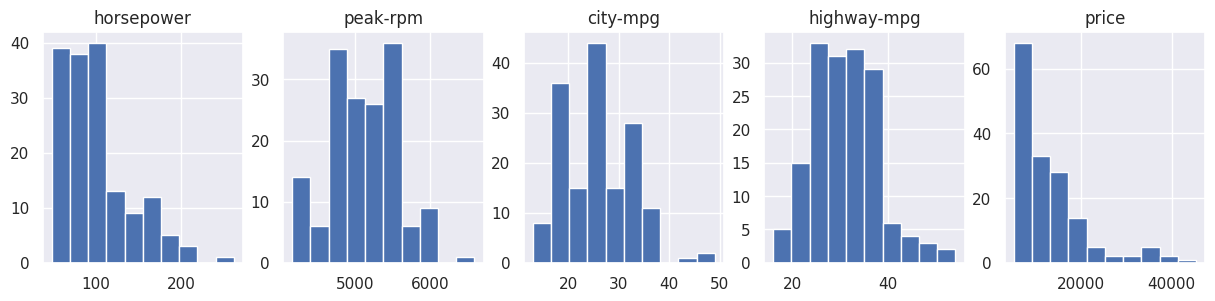

,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.000000
mean,101.468750,5105.625000,25.493750,31.025000,13064.675000
std,38.227542,467.059162,6.649346,7.106512,7971.548944
min,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,70.000000,4800.000000,19.000000,25.000000,7609.000000
50%,93.000000,5100.000000,25.000000,30.500000,10320.000000
75%,115.250000,5500.000000,31.000000,37.000000,16500.000000
max,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
plt.figure(figsize=(15, 3))
for i in range(len(columns)):
  plt.subplot(1, 5, i+1)
  plt.hist(np.array(car_train[columns[i]]))
  plt.title(columns[i])
plt.show()

display(car_train.describe())

### Feature correlations
Use pandas [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to print all the pairwise correlation coefficients for the columns (use the training data only). See also the [Wikipedia page on correlation](https://en.wikipedia.org/wiki/Correlation) for more background.

Use [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to examine each pair of features.


In [ ]:
correlation_matrix = car_train.corr()
correlation_matrix

,horsepower,peak-rpm,city-mpg,highway-mpg,price
horsepower,1.000000,0.104330,-0.815571,-0.798128,0.829328
peak-rpm,0.104330,1.000000,-0.140634,-0.084458,-0.082567
city-mpg,-0.815571,-0.140634,1.000000,0.973606,-0.695344
highway-mpg,-0.798128,-0.084458,0.973606,1.000000,-0.703647
price,0.829328,-0.082567,-0.695344,-0.703647,1.000000




*   The correlation between price and city-mpg is -0.695344, and the correlation between price and highway-mpg is -0.703647. Both these values are negative, indicating that as the price increases, both city and highway fuel efficiency (mpg) tend to decrease. Therefore, it appears that higher-priced cars have lower fuel efficiency.
*   The correlation between city-mpg and highway-mpg is 0.973606, which is very close to 1. This suggests a very high positive correlation, indicating that these two features are likely to be most redundant since they provide almost the same information.
* The feature peak-rpm has a correlation of -0.082567 with price, which is very close to 0. This implies that peak-rpm has very little linear relationship with the price, and thus, it is likely to be the least useful feature for predicting the price of a car.



## Tensorflow

Training a linear regression model using Tensorflow.

In [ ]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # linear regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch
  # SGD. We can specify the batch size to use for training later.
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, we compile the model. This finalizes the graph for training.
  # We specify the MSE loss.
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [ ]:
# Build a model.
model = build_model(num_features=1, learning_rate=0.0001)

# Use get_weights() which returns lists of weights and biases for the layer.
weights, biases = model.layers[0].get_weights()
print('Weights:', weights)
print('Biases:', biases)

Weights: [[1.]]
Biases: [1.]


In [ ]:
# Build a model and look at the initial parameter values.
model = build_model(num_features=2, learning_rate=0.0001)
weights, biases = model.layers[0].get_weights()
print('Weights:', weights)
print('Biases:', biases)

Weights: [[1.]
 [1.]]
Biases: [1.]


### Making predictions
A model is a computational graph. That means we can pass data (of the expected shape) through the model (using the current values of the parameters) to make predictions.

Before training, the parameters are set to their initial values (1s in our case). During training, we use the current predictions to compute a gradient and update the parameter values. Making predictions using the model is called **Inference**.

In [ ]:
# Build a model that expects 1 input feature.
model = build_model(num_features=1, learning_rate=0.0001)

# Make a prediction for a single input.
print(model.predict([42]))

# Make predictions for 2 inputs.
print(model.predict([42, 99]))

1/1 [==============================] - 0s 101ms/step
[[43.]]
1/1 [==============================] - 0s 40ms/step
[[ 43.]
 [100.]]


### Train a model
Training a model, initially with just 1 feature -- the horsepower. The `fit` function can take pandas DataFrame objects for input (x) and output (y). In addition, we can convert the return value into a DataFrame that tracks training metrics (in this case, training data loss and validation data loss) after each *epoch* (a full pass through the training data).

Remember that we're using SGD, which is actually mini-batch SGD. That is, each time the model estimates the loss for the current weights, it randomly samples a batch of training examples (of the specified size) to do so.

Finally, we'll reserve some more examples (taken out of the training set) as a *validation set*. We use this data to check for overfitting while training. Why not use the *test set* for this purpose? We want to maintain the purity of the test set so we try to only use it at the end of the experimental process.

In [ ]:
model = build_model(num_features=1, learning_rate=0.0001)

history = model.fit(
  x = car_train_features[['horsepower']],
  y = car_train_labels,
  validation_split=0.1,  # use 10% of the examples as a validation set
  epochs=5,
  batch_size=32,
  verbose=0)

# Convert the return value into a DataFrame so we can see the loss after each
# epoch. The history includes training data loss ('loss') and validation data
# loss ('val_loss').
history = pd.DataFrame(history.history)
display(history)

,loss,val_loss
0,9.451236e+08,2.757709e+09
1,1.157148e+10,2.634771e+10
2,8.129331e+10,3.772780e+11
3,1.176510e+12,3.559108e+12
4,5.976483e+12,3.931731e+13


#### Feature Normalization
1. Apply mean and variance normalization to produce **car_train_features_norm** and **car_test_features_norm**.

 * These should be copies of the car_train_features and car_test_features, but with normalized feature values. We're not normalizing the labels (prices).
 * DataFrame objects have `mean` and `std` functions.
 * **Important:** You can't normalize the test data by computing mean and variance on the test data, as this would violate our willful blindness of the test data.
2. Use the `describe` function to verify normalized data looks right.

In [ ]:
mean = car_train_features.mean()
std = car_train_features.std()

# Normalize the training data
car_train_features_norm = (car_train_features - mean) / std

# Normalize the test data using the mean and std of the training data
car_test_features_norm = (car_test_features - mean) / std

# Verify the normalization
train_describe = car_train_features_norm.describe()
test_describe = car_test_features_norm.describe()

In [ ]:
train_describe

,horsepower,peak-rpm,city-mpg,highway-mpg
count,160.000000,160.000000,1.600000e+02,1.600000e+02
mean,0.000000,0.000000,2.053913e-16,2.109424e-16
std,1.000000,1.000000,1.000000e+00,1.000000e+00
min,-1.398697,-2.046047,-1.878944e+00,-2.114258e+00
25%,-0.823196,-0.654360,-9.765999e-01,-8.478139e-01
50%,-0.221535,-0.012043,-7.425543e-02,-7.387590e-02
75%,0.360506,0.844379,8.280890e-01,8.407781e-01
max,4.199361,3.199541,3.535122e+00,3.232950e+00


In [ ]:
test_describe

,horsepower,peak-rpm,city-mpg,highway-mpg
count,39.000000,39.000000,39.000000,39.000000
mean,0.257378,0.130694,-0.224646,-0.245261
std,0.888604,1.147576,0.824446,0.778770
min,-1.084787,-1.938994,-1.578163,-1.832826
25%,-0.456968,-0.654360,-0.976600,-0.847814
50%,0.327807,0.202062,-0.224646,-0.144234
75%,0.720194,0.844379,0.226526,0.207556
max,2.760608,3.199541,1.880824,1.544358


### Training with features
Here's a simple function that plots train and validation set loss.

In [ ]:
def plot_loss(model, history):
  """Plot the loss after each training epoch."""
  # Convert the history object into a DataFrame.
  history = pd.DataFrame(history.history)

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(range(len(history)), history['loss'], marker='.', color='black')
  plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
  plt.legend(['train loss', 'validation loss'])
  plt.show()

  # Show the final train loss value and the learned model weights.
  print('Final train loss:', list(history['loss'])[-1])
  print('Final weights:', model.layers[0].get_weights())

#### Adjusting Learning Rate
1. Retrain the model predicting price from horsepower, but now using your normalized features.
2. Report validation loss for learning rates [0.0001, 0.001, 0.01, 0.1, 1] after 150 epochs of training.

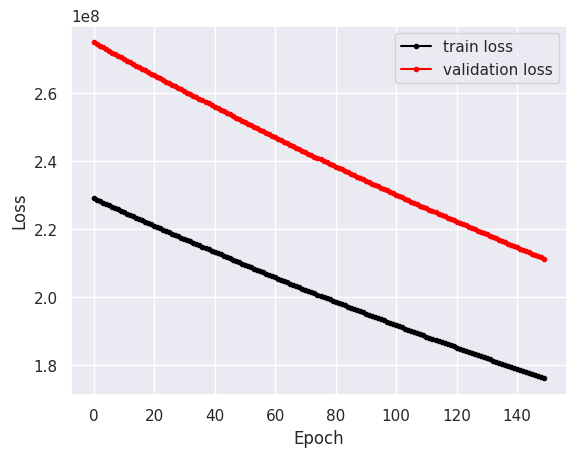

Final train loss: 176059392.0
Final weights: [array([[840.51404]], dtype=float32), array([1813.1569], dtype=float32)]


In [ ]:
model = build_model(num_features=1, learning_rate=.0001)

history = model.fit(
  # use the normalized features prepared above
  x = car_train_features_norm[['horsepower']],
  y = car_train_labels,
  validation_split=0.1,
  epochs=150,
  batch_size=32,
  verbose=0)

plot_loss(model, history)

Learning rate: 0.0001, Validation Loss: 182311808.0
Learning rate: 0.001, Validation Loss: 36970764.0
Learning rate: 0.01, Validation Loss: 18509154.0
Learning rate: 0.1, Validation Loss: 18506134.0
Learning rate: 1, Validation Loss: 34046084.0


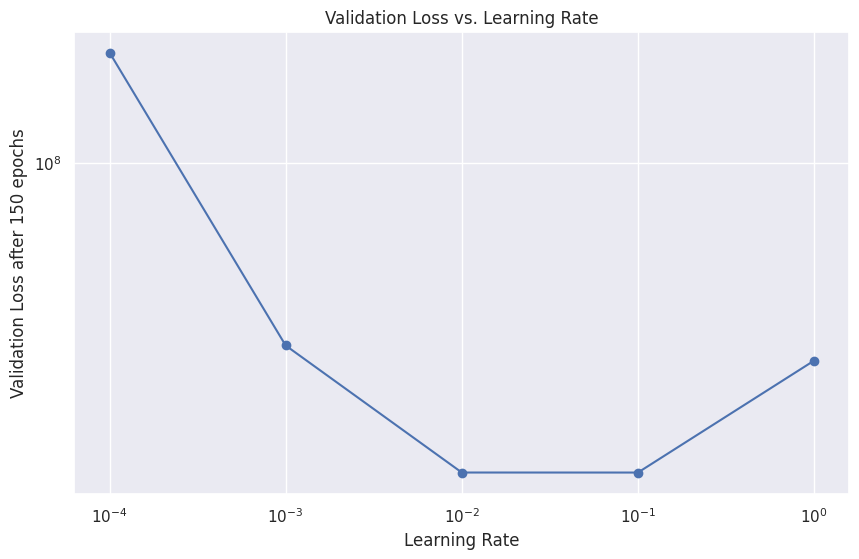

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
validation_losses = []

for lr in learning_rates:
    model = build_model(num_features=1,learning_rate=lr)
    history = model.fit(
        car_train_features_norm[['horsepower']],
        car_train_labels,
        validation_split=0.2,
        epochs=150,
        batch_size=32,
        verbose=0
    )
    val_loss = history.history['val_loss'][-1]
    validation_losses.append(val_loss)
    print(f"Learning rate: {lr}, Validation Loss: {val_loss}")

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, validation_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss after 150 epochs')
plt.title('Validation Loss vs. Learning Rate')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

The learning rate that produces the best (lowest) validation loss is 0.01. This is evident from the plot, where the point corresponding to the learning rate of 0.01 is at the lowest position on the y-axis, which represents the validation loss after 150 epochs.

#### Adding Features
Compiling a table of results -- RMSE computed on the test data for the baseline and 4 models.

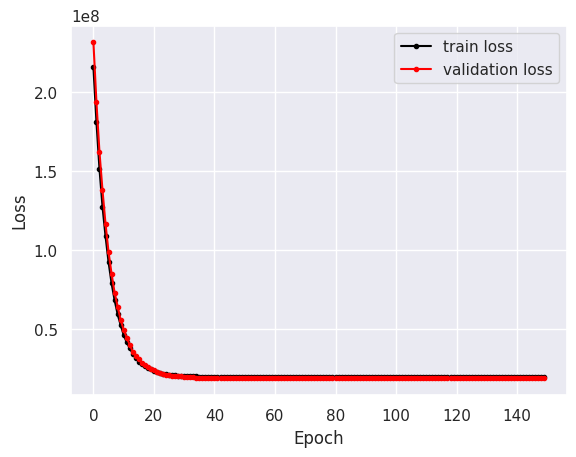

Final train loss: 19829208.0
Final weights: [array([[6535.6763]], dtype=float32), array([13029.8955], dtype=float32)]
Test rmse: 5480.311852440516


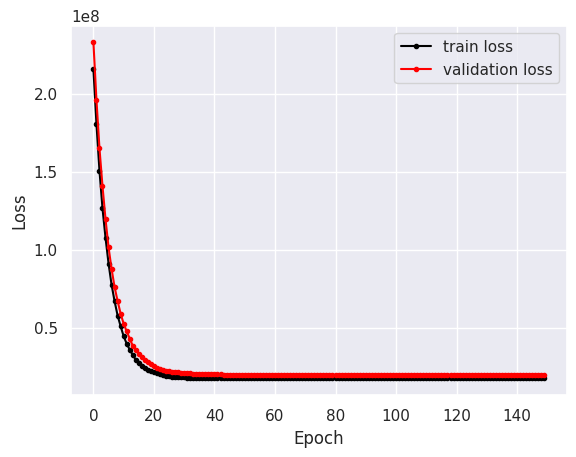

Final train loss: 17721160.0
Final weights: [array([[ 6649.286 ],
       [-1482.6652]], dtype=float32), array([13015.372], dtype=float32)]
Test rmse: 5072.518900901208


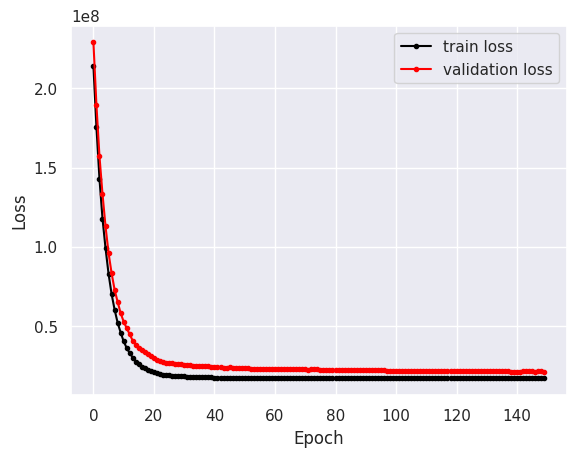

Final train loss: 17297126.0
Final weights: [array([[ 5591.4443],
       [-1507.7004],
       [-1216.8341]], dtype=float32), array([12995.716], dtype=float32)]
Test rmse: 4978.610649568814


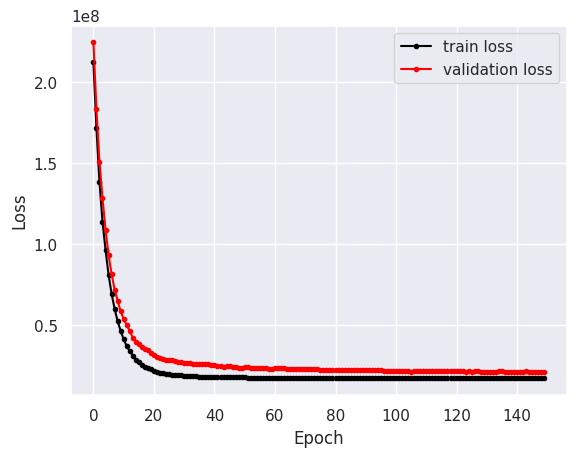

Final train loss: 17292606.0
Final weights: [array([[ 5711.921 ],
       [-1503.803 ],
       [-1143.5787],
       [   76.0156]], dtype=float32), array([12997.804], dtype=float32)]
Test rmse: 4982.229822077661


In [ ]:
def run_experiment(features, learning_rate):
  model = build_model(len(features), learning_rate)

  history = model.fit(
    x = car_train_features_norm[features],
    y = car_train_labels,
    validation_split=0.1,
    epochs=150,
    batch_size=32,
    verbose=0)

  plot_loss(model, history)

  # Make predictions on test data
  test_loss = model.evaluate(car_test_features_norm[features],
                             car_test_labels,
                             verbose=0)
  test_rmse = np.sqrt(test_loss)
  print('Test rmse:', test_rmse)
# Best learning rate obtained previously
best_learning_rate = 0.01

# Run experiments for different feature sets
feature_sets = [
    ['horsepower'],
    ['horsepower', 'peak-rpm'],
    ['horsepower', 'peak-rpm', 'highway-mpg'],
    ['horsepower', 'peak-rpm', 'highway-mpg', 'city-mpg']
]

for features in feature_sets:
    run_experiment(features, best_learning_rate)

WRITE YOUR ANSWER HERE

Model | Test RMSE
--- | ---
Baseline | 8018.000777288523
Horsepower | 5480.311852440516
  + Peak-RPM | 5072.518900901208
  + Highway-MPG | 4978.610649568814
  + City-MPG | 4982.229822077661
